# Desicion surface based on MLP

# Importing required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from mlxtend.plotting import plot_decision_regions;

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\7.xor.csv",header=None)

In [3]:
data

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0
...,...,...,...
495,0.441033,0.178793,-1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,-1.0
498,-0.198399,0.094192,1.0


This dataset consists of 500 datapoints with three feature variables.



In [4]:
data[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

The data[2] is the class lable and has two unique values

In [5]:
data[[1,0]].shape

(500, 2)

# Scatterplot of original dataset

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

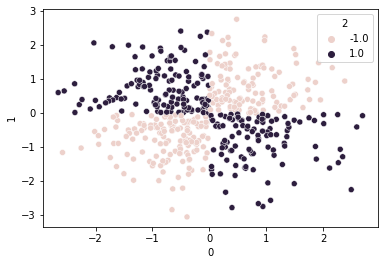

In [6]:
sns.scatterplot(data[0],data[1],hue=data[2])

The above is the scatterplot which visualises the spread of all the observations for original dataset

# Splitting of dataset

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [8]:
scaler = StandardScaler()


In [9]:
std=scaler.fit_transform(x_train)

# Creating hidden layers 

In [10]:
model = Sequential()
#this is a sequential data so initialising sequential is the first step
model.add(Dense(8,activation='relu',input_dim=2,kernel_initializer="he_uniform"))
#to the sequential data we are making a dense layer with activation fiunction, input_dim is the dimension of dataset
# kernel_initialiser you can use based on your activation function
model.add(Dense(6,activation='relu',kernel_initializer="he_uniform"))
model.add(Dense(3,activation='relu',kernel_initializer="he_uniform"))
model.add(Dense(1,activation='sigmoid'))

Here I created four dense layers that is nothing but fully connected layers .

activation function used is relu which works best with the combination of he_normal/unoform kernel_initializer

the final layer should be sigmoid activation function as it is dealing with binary classification only one output is required

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


Summary describes total layers 

Total trainable parameters

remembering one most importnt thing is every neuron has a bias 



# Compiling 

In [12]:

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

compiling we get to know the loss fuction and optimal weight by optimizer accuracy by metrics

optimizer which is widely used is "adam" 

as it is two class classification we use binary_crossentropy as loss function 

# Training

In [13]:
save1=model.fit(x_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
41/41 [==============================] - 11s 24ms/step - loss: 0.6813 - accuracy: 0.1901 - val_loss: 0.6550 - val_accuracy: 0.2444
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 0.6341 - accuracy: 0.2889 - val_loss: 0.6025 - val_accuracy: 0.3333
Epoch 3/50
41/41 [==============================] - 0s 9ms/step - loss: 0.5861 - accuracy: 0.3827 - val_loss: 0.5474 - val_accuracy: 0.3556
Epoch 4/50
41/41 [==============================] - 0s 10ms/step - loss: 0.5340 - accuracy: 0.4370 - val_loss: 0.5028 - val_accuracy: 0.4000
Epoch 5/50
41/41 [==============================] - 0s 6ms/step - loss: 0.4909 - accuracy: 0.4494 - val_loss: 0.4573 - val_accuracy: 0.4000
Epoch 6/50
41/41 [==============================] - 0s 9ms/step - loss: 0.4507 - accuracy: 0.4420 - val_loss: 0.4202 - val_accuracy: 0.4000
Epoch 7/50
41/41 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.4444 - val_loss: 0.3799 - val_accuracy: 0.4000
Epoch 8/50
41/41 

for training we use training set

when we give batchsize internally is is using mini_batch SGD 

epochs used are 50 , it gives loss function for every epoch 

1 epoch is equal to all the datapoints once finish iteration 

here total 500 datapoints batch_size is 10 that means 50 batchs , that is if 50 batche sfinish their iteration once 

it is 1 epoch and 1 loss function

In [14]:
pred=model.predict(x_train)

15/15 [==============================] - 1s 3ms/step


for predicting the model accuracy we pass x_train set and predict the model

In [15]:
pred1=np.where(pred>0.5,1,-1).flatten()

as the class label here are 1 and -1,using numpy.where function we label the predicted values and flatten them to an array

and find the accuracy score

In [16]:
accuracy_score(y_train,pred1)

0.9533333333333334

In [17]:
tl1=save1.history["loss"]
cvl1=save1.history["val_loss"]

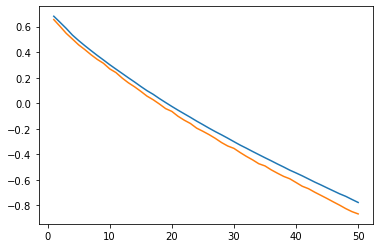

In [18]:
plt.plot(range(1,51),tl1,label="training_loss")
plt.plot(range(1,51),cvl1,label="crossval_loss")

this is plot for training_loss and crossval_loss , there is no much  overfitting issue with this dataset

3888/3888 [==============================] - 9s 2ms/step


<AxesSubplot:>

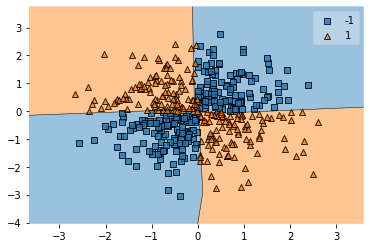

In [19]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)